In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re

In [2]:
#creating a function to open the JSON file.
#Standard method does not seem to work and thus using yield

def open_json():
    with open('arxiv-metadata-oai-snapshot.json') as f:
        for line in f:
            yield line

In [3]:
#intialising the function to open the file
metadata = open_json()

#converting into a python dictionary - using "break" to stop after first iteration
for paper in metadata:
    first_paper = json.loads(paper)
    break

In [4]:
#examining the dictionary

first_paper

{'id': '0704.0001',
 'submitter': 'Pavel Nadolsky',
 'authors': "C. Bal\\'azs, E. L. Berger, P. M. Nadolsky, C.-P. Yuan",
 'title': 'Calculation of prompt diphoton production cross sections at Tevatron and\n  LHC energies',
 'comments': '37 pages, 15 figures; published version',
 'journal-ref': 'Phys.Rev.D76:013009,2007',
 'doi': '10.1103/PhysRevD.76.013009',
 'report-no': 'ANL-HEP-PR-07-12',
 'categories': 'hep-ph',
 'license': None,
 'abstract': '  A fully differential calculation in perturbative quantum chromodynamics is\npresented for the production of massive photon pairs at hadron colliders. All\nnext-to-leading order perturbative contributions from quark-antiquark,\ngluon-(anti)quark, and gluon-gluon subprocesses are included, as well as\nall-orders resummation of initial-state gluon radiation valid at\nnext-to-next-to-leading logarithmic accuracy. The region of phase space is\nspecified in which the calculation is most reliable. Good agreement is\ndemonstrated with data from th

In [5]:
#a cleaner way of looking at the details - again only the first paper is being loaded
metadata = open_json()

for paper in metadata:
    for k, v in json.loads(paper).items():
        print(f'{k}: {v}')
    break

id: 0704.0001
submitter: Pavel Nadolsky
authors: C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-P. Yuan
title: Calculation of prompt diphoton production cross sections at Tevatron and
  LHC energies
comments: 37 pages, 15 figures; published version
journal-ref: Phys.Rev.D76:013009,2007
doi: 10.1103/PhysRevD.76.013009
report-no: ANL-HEP-PR-07-12
categories: hep-ph
license: None
abstract:   A fully differential calculation in perturbative quantum chromodynamics is
presented for the production of massive photon pairs at hadron colliders. All
next-to-leading order perturbative contributions from quark-antiquark,
gluon-(anti)quark, and gluon-gluon subprocesses are included, as well as
all-orders resummation of initial-state gluon radiation valid at
next-to-next-to-leading logarithmic accuracy. The region of phase space is
specified in which the calculation is most reliable. Good agreement is
demonstrated with data from the Fermilab Tevatron, and predictions are made for
more detailed tests w

In [6]:
#examining the attributes
for key in first_paper:
    print(key)

id
submitter
authors
title
comments
journal-ref
doi
report-no
categories
license
abstract
versions
update_date
authors_parsed


In [7]:
total_papers=0

for paper in metadata:
    total_papers+=1
    
print(total_papers)


2061366


In [8]:
#checking for the number of papers with covid in the title
#used the function in case there are inconsistencies in spelling

metadata = open_json()
covid_papers= 0

for paper in metadata:
    paper=json.loads(paper)
    #print(paper['title'])
    if 'covid' in paper['title'].lower():
        covid_papers+=1
    #break
        
        


In [9]:
 print(covid_papers)

3714


In [10]:
#here i am preparing empty lists that will be populated as the code further below goes through each paper
_id=[]
_title=[]
_comments=[]
_journal_ref=[]
_categories=[]


In [11]:
metadata = open_json()

for paper in metadata:
    paper=json.loads(paper)
    if 'covid' not in paper['title'].lower():
        _id.append(paper['id'])
        _title.append(paper['title'])
        _comments.append(paper['comments'])
        _journal_ref.append(paper['journal-ref'])
        _categories.append(paper['categories'])

In [12]:
#adding the year in from the ID using  https://arxiv.org/help/arxiv_identifier
_year=[]
for i in _id:
    if i.find('/') >= 0:
        # (1991 - March 2007)
        id_split = re.split(r'/', i)
        year_end = int(id_split[1][:2])

        # add 1900 or 2000
        if year_end > 90:
            journal_year = 1900 + year_end
            _year.append(journal_year)
        else:
            journal_year = 2000 + year_end
            _year.append(journal_year)
    else:
        #  (March 2007+)
        journal_year = 2000 + int(i[:2])
        _year.append(journal_year)

In [13]:
cols = {'ID':_id,'Title':_title,'Comments':_comments,'Journal Ref':_journal_ref,'Categories':_categories,'Year':_year}

In [14]:
#creating the new dataframe

data=pd.DataFrame(cols)

In [15]:
#checking the new dataframe
data.sample(10)

,ID,Title,Comments,Journal Ref,Categories,Year
1986831,math/0701882,Local torsion on elliptic curves and the defor...,None,None,math.NT,2007
219181,1010.2793,Quantum Commitments from Complexity Assumptions,v2 30p,None,quant-ph,2010
1330512,2008.04169,Multi-level Delumping Strategy for Thermal Enh...,None,None,physics.comp-ph,2020
945576,1802.06036,Learning multiagent coordination in the absenc...,None,None,cs.GT,2018
521150,1405.0242,"Structural, magnetic and superconducting chara...","8 pages, 4 figures",Journal of Superconductivity and Novel Magneti...,cond-mat.str-el cond-mat.mtrl-sci,2014
1701427,astro-ph/0703306,The observed ionization rate of the intergalac...,"20 pages, 9 figures, accepted for publication ...",None,astro-ph,2007
477988,1311.4327,The optical emission lines of type 1 X-ray bri...,Accepted for publication on Advances in Space ...,None,astro-ph.GA,2013
2052357,quant-ph/0701207,Roughness suppression via rapid current modula...,None,Physical Review Letters (29/01/2007) 4,quant-ph cond-mat.other,2007
2029980,physics/0701219,Estimating Intermittency Exponent in Neutrally...,None,None,physics.flu-dyn physics.ao-ph,2007
127915,0906.1364,"Generalized B\""acklund-Darboux transformations...","51 pages. Final version, to appear in Acta Mat...","Acta Math., (2011) 206, 245--310",math.QA,2009


In [16]:
#checking the size of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2057653 entries, 0 to 2057652
Data columns (total 6 columns):
ID             object
Title          object
Comments       object
Journal Ref    object
Categories     object
Year           int64
dtypes: int64(1), object(5)
memory usage: 94.2+ MB


In [17]:
#cleaning the data-set by removing those without any comments
data.dropna(subset=['Comments'],inplace=True)

In [18]:
#checking new size
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1598729 entries, 0 to 2057652
Data columns (total 6 columns):
ID             1598729 non-null object
Title          1598729 non-null object
Comments       1598729 non-null object
Journal Ref    650331 non-null object
Categories     1598729 non-null object
Year           1598729 non-null int64
dtypes: int64(1), object(5)
memory usage: 85.4+ MB


In [19]:
#checking number of empty rows within each category
data.isna().sum()

ID                  0
Title               0
Comments            0
Journal Ref    948398
Categories          0
Year                0
dtype: int64

In [20]:
#removing leading and trailing spaces
data['Comments']=data['Comments'].str.strip()

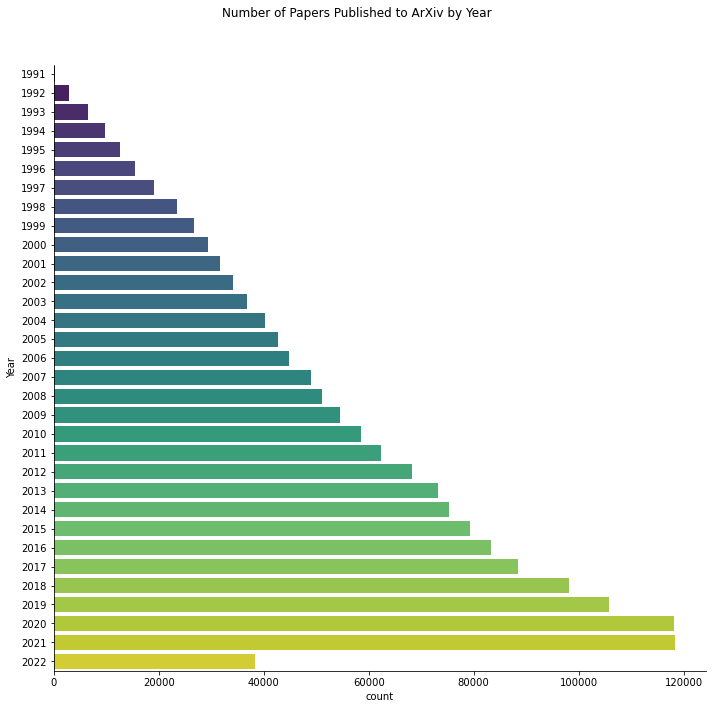

In [21]:
#plt.figure(figsize=(12,12))

g=sns.catplot(data=data,y='Year',kind="count",orient="h",palette='viridis',height=10)
g.fig.subplots_adjust(top=0.9) 
g.fig.suptitle("Number of Papers Published to ArXiv by Year")
plt.savefig("Papers by year.png",dpi=200, bbox_inches='tight')

In [22]:
years=data['Year'].value_counts().to_frame().reset_index()

years

,index,Year
0,2021,118242
1,2020,118188
2,2019,105838
3,2018,98074
4,2017,88376
5,2016,83289
6,2015,79292
7,2014,75224
8,2013,73210
9,2012,68285


In [23]:
#dropping 2022, which is at index 18 from the 

dropped= years.drop(18)
dropped = dropped.rename({'index': 'Year', 'Year': 'Count'}, axis=1)  # new method
dropped

,Year,Count
0,2021,118242
1,2020,118188
2,2019,105838
3,2018,98074
4,2017,88376
5,2016,83289
6,2015,79292
7,2014,75224
8,2013,73210
9,2012,68285


No handles with labels found to put in legend.


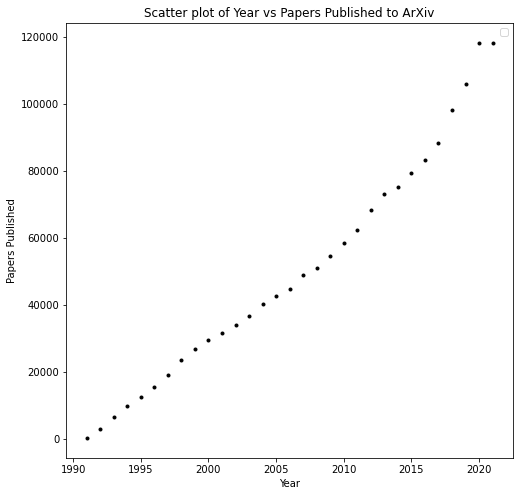

In [24]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(dropped['Year'], dropped['Count'],'k.')
plt.xlabel('Year')
plt.ylabel('Papers Published')
plt.title('Scatter plot of Year vs Papers Published to ArXiv')

# configure legend
plt.legend(loc=0)

leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontsize=10)
plt.savefig("Papes by year scatter.png",dpi=200, bbox_inches='tight')

In [25]:
corr=dropped.corr()
corr

,Year,Count
Year,1.000000,0.986157
Count,0.986157,1.000000


In [26]:
from statsmodels.formula.api import ols

model = ols("Count ~ Year", dropped).fit()
# Print the summary
print((model.summary()))

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     1026.
Date:                Wed, 18 May 2022   Prob (F-statistic):           3.48e-24
Time:                        21:01:46   Log-Likelihood:                -311.05
No. Observations:                  31   AIC:                             626.1
Df Residuals:                      29   BIC:                             629.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.304e+06    2.3e+05    -31.808      0.0

C:\Users\matth\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\matth\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  if sys.path[0] == '':


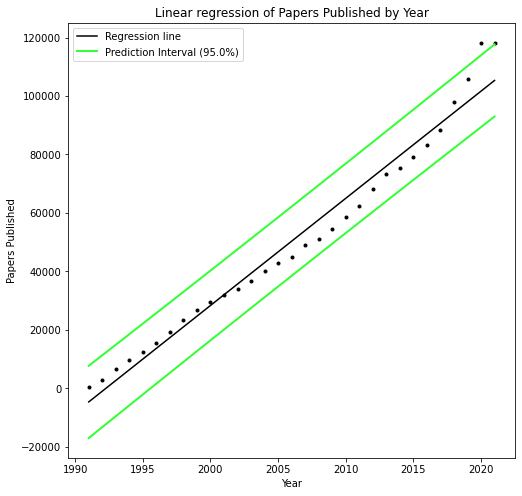

In [27]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std



alpha=0.05
limit = (1-alpha)*100

fig, ax = plt.subplots(figsize=(8,8))
ax.plot(dropped['Year'], dropped['Count'],'k.')
ax.plot(dropped['Year'], model.fittedvalues, 'k', label='Regression line')
ax.plot(dropped['Year'], wls_prediction_std(model)[1], 'k', lw=2, color=(0.2,1,0.2),label='Prediction Interval ({0:.1f}%)'.format(limit))
ax.plot(dropped['Year'], wls_prediction_std(model)[2], 'k', lw=2, color=(0.2,1,0.2))
plt.xlabel('Year')
plt.ylabel('Papers Published')
plt.title('Linear regression of Papers Published by Year')

# configure legend
plt.legend(loc=0)

leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontsize=10)
plt.savefig("scatter with linear regression.png",dpi=200,bbox_inches='tight')

In [28]:
#getting the count of each category in the Categories column
count=data['Categories'].value_counts()

#selecting the top 10 and converting the series to a dataframe
top10=count[0:10].to_frame()

In [29]:
#resetting the index
top10.reset_index(inplace=True)

top10

,index,Categories
0,astro-ph,85700
1,hep-ph,74351
2,hep-th,54083
3,quant-ph,49687
4,gr-qc,25533
5,cond-mat.mes-hall,24525
6,astro-ph.GA,24020
7,astro-ph.SR,23002
8,cs.CV,22890
9,cond-mat.mtrl-sci,22705


In [30]:
#renaming the column headers
top10_2 = top10.rename({'index': 'Category', 'Categories': 'Count'}, axis=1)  # new method
top10_2

,Category,Count
0,astro-ph,85700
1,hep-ph,74351
2,hep-th,54083
3,quant-ph,49687
4,gr-qc,25533
5,cond-mat.mes-hall,24525
6,astro-ph.GA,24020
7,astro-ph.SR,23002
8,cs.CV,22890
9,cond-mat.mtrl-sci,22705


<Figure size 864x864 with 0 Axes>

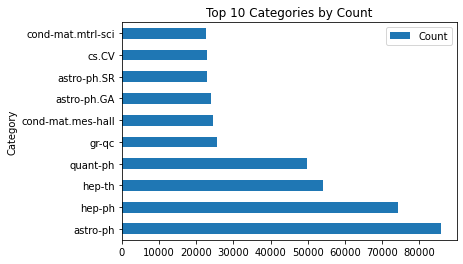

In [31]:
#plotting a horizontal bar chart of the top 10 categories
plt.figure(figsize=(12,12))
ax = top10_2.plot.barh(x='Category', y='Count')
ax.set_title("Top 10 Categories by Count")
plt.savefig("Category bar char.png",dpi=200)

In [32]:
#converting the title to a string with each title separated by a comma
words=data['Title'].str.cat(sep=",")

In [33]:
type(words)

str

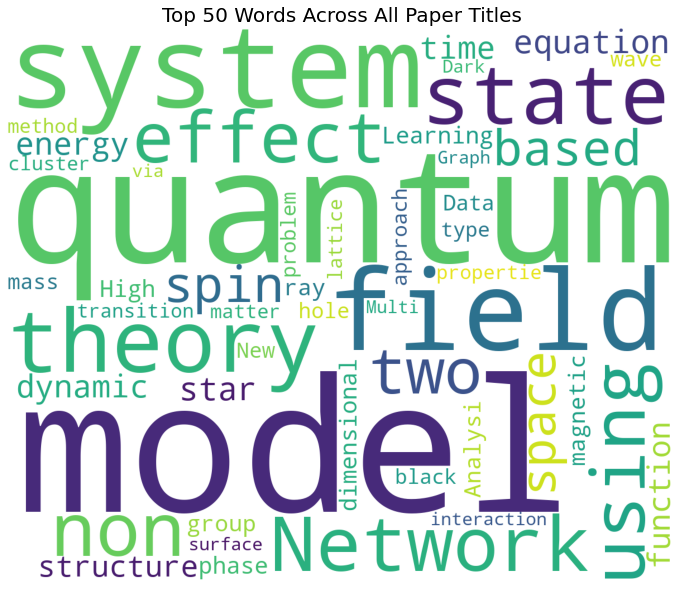

In [34]:
#creating a wordcloud
plt.figure(figsize=(12,12))
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',collocations=False,width=1200,height=1000,max_words=50).generate(words)

plt.title('Top 50 Words Across All Paper Titles',fontsize=20)
plt.axis('off')
plt.imshow(wordcloud)
plt.savefig("wordcloud.png",dpi=200,bbox_inches='tight')

In [35]:
#exporting the file to CSV

data.to_csv("data_export.csv")